## Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [81]:
df_final = pd.read_csv('clean_dataset.csv')
df_final.head()

,sellingprice,year,condition,odometer,date,make_acura,make_aston martin,make_audi,make_bentley,make_bmw,...,day_Tue,day_Wed,month_Apr,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May
0,21500,2015,5.0,16639.0,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,21500,2015,5.0,9393.0,16,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,30000,2014,4.5,1331.0,15,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,27750,2015,4.1,14282.0,29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,10900,2015,1.0,5554.0,30,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## Modelling

### Feature/Target

In [82]:
x = df_final.iloc[:,1:]
y = df_final.iloc[:,0]

In [83]:
x, y

(        year  condition  odometer  date  make_acura  make_aston martin  \
 0       2015        5.0   16639.0    16           0                  0   
 1       2015        5.0    9393.0    16           0                  0   
 2       2014        4.5    1331.0    15           0                  0   
 3       2015        4.1   14282.0    29           0                  0   
 4       2015        1.0    5554.0    30           0                  0   
 ...      ...        ...       ...   ...         ...                ...   
 517754  2015        4.5   18255.0     9           0                  0   
 517755  2012        5.0   54393.0     8           0                  0   
 517756  2012        4.8   50561.0     8           0                  0   
 517757  2015        3.8   16658.0     9           0                  0   
 517758  2014        3.4   15008.0    28           0                  0   
 
         make_audi  make_bentley  make_bmw  make_buick  ...  day_Tue  day_Wed  \
 0               

### train, test split

In [84]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=69) #Splitting the data into Train and Test

In [85]:
xtrain, xtest, ytrain, ytest

(        year  condition  odometer  date  make_acura  make_aston martin  \
 394086  2014        4.5   15731.0    22           0                  0   
 341747  2014        4.9   16985.0     3           0                  0   
 266349  2013        4.4   25896.0    17           0                  0   
 241178  2012        4.1   21671.0    12           0                  0   
 249000  2007        3.0   85415.0     9           0                  0   
 ...      ...        ...       ...   ...         ...                ...   
 25015   2012        4.7   14130.0    18           0                  0   
 140890  2004        3.1  164837.0    22           0                  0   
 462793  2014        3.5   41906.0     4           0                  0   
 384203  2014        3.8   13759.0    29           0                  0   
 457782  2004        2.7  103795.0     1           0                  0   
 
         make_audi  make_bentley  make_bmw  make_buick  ...  day_Tue  day_Wed  \
 394086          

### Fitting

In [86]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [87]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(xtrain, ytrain)

Ridge()

In [88]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(xtrain, ytrain)

Lasso()

In [89]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(xtrain, ytrain)

ElasticNet()

In [90]:
from xgboost import XGBRegressor
xg = XGBRegressor(verbosity=2)
xg.fit(xtrain,ytrain)

[19:52:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[19:52:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:52:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:52:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:52:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[19:52:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 124 extra nod

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=2)

In [91]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

### Model Evaluation

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = [reg, ridge, lasso, en, xg, dt]

for i in model:
    score = round(r2_score(ytest, i.predict(xtest)),4)
    score_train = round(r2_score(ytrain, i.predict(xtrain)),4)
    rmse = round(mean_squared_error(ytest, i.predict(xtest), squared=False),4)
    mae = round(mean_absolute_error(ytest, i.predict(xtest)),4)
    print(i, score, score_train, rmse, mae)

LinearRegression() 0.7434 0.7439 4164.7171 3094.4917
Ridge() 0.7433 0.7439 4165.0058 3094.7625
Lasso() 0.7425 0.7432 4171.6736 3097.9868
ElasticNet() 0.5432 0.5438 5556.382 4228.5245
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=2) 0.836 0.844 3329.1142 2294.3902
DecisionTreeRegressor() 0.697 1.0 4525.266 2928.0116


### Feature Selection

In [93]:
xg.feature_importances_

array([0.02401717, 0.01211564, 0.03229927, 0.00026288, 0.0241858 ,
       0.00057806, 0.03798853, 0.00191185, 0.09175898, 0.00345927,
       0.02684388, 0.00382766, 0.00135172, 0.        , 0.00668699,
       0.00778934, 0.00048173, 0.00517359, 0.00536232, 0.00225909,
       0.00650715, 0.00707625, 0.06256375, 0.00039215, 0.01672314,
       0.00216896, 0.05037073, 0.04232457, 0.05830976, 0.03254896,
       0.00060433, 0.00515083, 0.00782785, 0.06153427, 0.00275077,
       0.00146739, 0.01452548, 0.01932701, 0.        , 0.00026539,
       0.00270742, 0.0161206 , 0.00143505, 0.00098736, 0.00551296,
       0.00189509, 0.00655586, 0.00627102, 0.00807259, 0.00516925,
       0.00373271, 0.01026828, 0.01719132, 0.00209093, 0.00325647,
       0.04747644, 0.0220356 , 0.04124903, 0.04883063, 0.0107674 ,
       0.00258315, 0.00379263, 0.00159034, 0.        , 0.00039276,
       0.00065096, 0.00301816, 0.0006627 , 0.00143593, 0.00028697,
       0.00260738, 0.00102536, 0.00071284, 0.00059697, 0.00031

In [94]:
x.columns

Index(['year', 'condition', 'odometer', 'date', 'make_acura',
       'make_aston martin', 'make_audi', 'make_bentley', 'make_bmw',
       'make_buick',
       ...
       'day_Tue', 'day_Wed', 'month_Apr', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May'],
      dtype='object', length=121)

In [112]:
fi_summary = pd.DataFrame({'feature':x.columns,'importance':xg.feature_importances_}).sort_values('importance',ascending=False)
top_50_feature = fi_summary.sort_values('importance',ascending=False).head(50)['feature']

In [113]:
top_50 = fi_summary.head(50).sort_values('importance',ascending=True)

<BarContainer object of 50 artists>

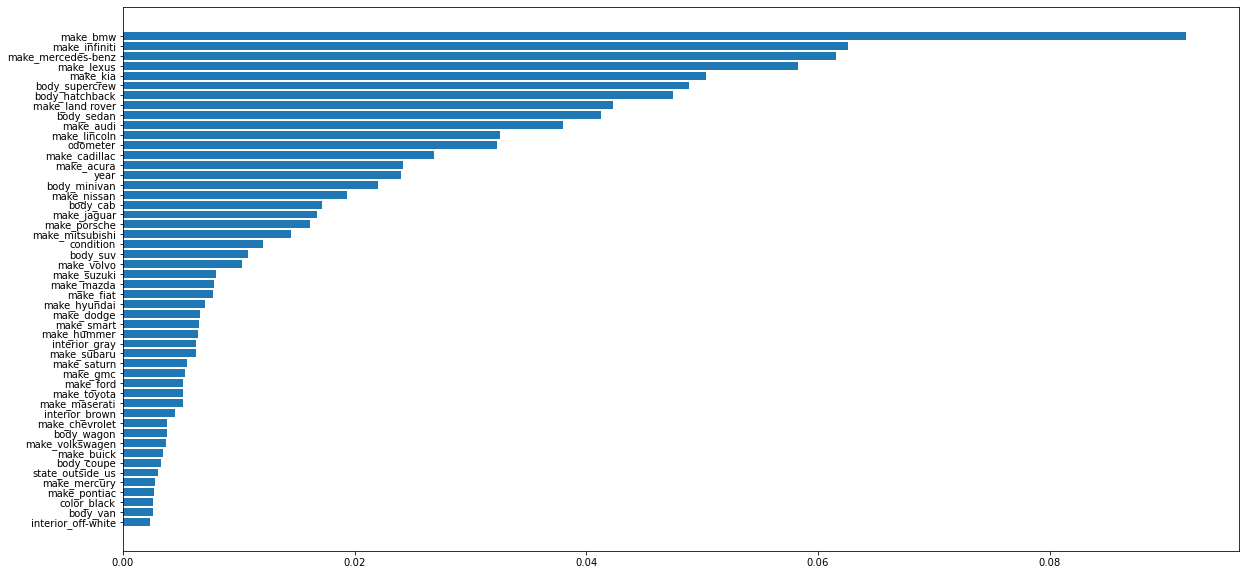

In [114]:
plt.figure(figsize=(20,10))
plt.barh(top_50['feature'],top_50['importance'])

In [115]:
df_50 = df_final[top_50_feature].copy()
df_50['sellingprice'] = df_final['sellingprice'].copy()
                       
df_50

,make_bmw,make_infiniti,make_mercedes-benz,make_lexus,make_kia,body_supercrew,body_hatchback,make_land rover,body_sedan,make_audi,...,make_volkswagen,make_buick,body_coupe,state_outside_us,make_mercury,make_pontiac,color_black,body_van,interior_off-white,sellingprice
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21500
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21500
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,30000
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,27750
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517754,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,33000
517755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30800
517756,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,34000
517757,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,11100


In [116]:
# df.loc[:, df.columns != 'b']
x_50 = df_50.loc[:,df_50.columns!='sellingprice']
y_50 = df_50.loc[:,'sellingprice']

### train, test split

In [117]:
from sklearn.model_selection import train_test_split
xtrain50, xtest50, ytrain50, ytest50 = train_test_split(x_50,y_50,test_size=0.2, random_state=69) #Splitting the data into Train and Test

In [118]:
xtrain50, xtest50, ytrain50, ytest50

(        make_bmw  make_infiniti  make_mercedes-benz  make_lexus  make_kia  \
 394086         0              0                   0           1         0   
 341747         0              0                   0           0         0   
 266349         0              0                   0           0         0   
 241178         0              0                   0           0         0   
 249000         0              0                   0           0         0   
 ...          ...            ...                 ...         ...       ...   
 25015          0              0                   0           0         0   
 140890         0              0                   0           0         0   
 462793         0              0                   0           0         0   
 384203         0              0                   0           0         0   
 457782         0              0                   0           0         0   
 
         body_supercrew  body_hatchback  make_land rover  body

### Fitting

In [119]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain50, ytrain50)

LinearRegression()

In [120]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(xtrain50, ytrain50)

Ridge()

In [121]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(xtrain50, ytrain50)

Lasso()

In [122]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(xtrain50, ytrain50)

ElasticNet()

In [128]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators= 800,
                  min_child_weight= 10,
                  max_depth= 9,
                  learning_rate= 0.05,
                  verbosity=2)
xg.fit(xtrain50,ytrain50)

[20:49:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 728 extra nodes, 0 pruned nodes, max_depth=9
[20:49:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 740 extra nodes, 0 pruned nodes, max_depth=9
[20:49:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 728 extra nodes, 0 pruned nodes, max_depth=9
[20:49:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 732 extra nodes, 0 pruned nodes, max_depth=9
[20:49:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 728 extra nodes, 0 pruned nodes, max_depth=9
[20:49:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 746 extra nod

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=9, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=2)

In [124]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain50, ytrain50)

DecisionTreeRegressor()

### Model Evaluation

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = [reg, ridge, lasso, en, xg, dt]

for i in model:
    score = round(r2_score(ytest50, i.predict(xtest50)),4)
    score_train = round(r2_score(ytrain50, i.predict(xtrain50)),4)
    rmse = round(mean_squared_error(ytest50, i.predict(xtest50), squared=False),4)
    mae = round(mean_absolute_error(ytest50, i.predict(xtest50)),4)
    print(i, score, score_train, rmse, mae)

LinearRegression() 0.74 0.7408 4191.7007 3112.9782
Ridge() 0.74 0.7408 4191.7134 3112.9861
Lasso() 0.7398 0.7405 4193.6432 3114.4746
ElasticNet() 0.5401 0.5406 5575.1429 4245.5476
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=9, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=2) 0.8397 0.8586 3291.7141 2228.4065
DecisionTreeRegressor() 0.674 0.9999 4694.2358 3080.5928


### Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#kurangin fitur duluu!
hyperparameters = dict(
    learning_rate=[0.05, 0.1, 0.2], 
    n_estimators=[100, 400, 800],
    max_depth=[3, 6, 9], #
    min_child_weight=[1, 10, 100]
)

rs = RandomizedSearchCV(xg, hyperparameters, n_jobs=3, cv=5, verbose=3, n_iter=30, refit='r2', scoring=['r2','neg_root_mean_squared_error'])
rs.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[19:51:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 738 extra nodes, 0 pruned nodes, max_depth=9
[19:51:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 750 extra nodes, 0 pruned nodes, max_depth=9
[19:51:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 750 extra nodes, 0 pruned nodes, max_depth=9
[19:51:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 748 extra nodes, 0 pruned nodes, max_depth=9
[19:51:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 744 extra nodes, 0 pruned nodes, max_depth=9
[19:51:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [14]:
rs.best_params_

{'n_estimators': 800,
 'min_child_weight': 10,
 'max_depth': 9,
 'learning_rate': 0.05}

In [15]:
rs.best_score_

0.8545668622389361

In [16]:
y_predict_rs = rs.predict(xtest)

In [18]:
r2_score(ytest, y_predict_rs)

0.8542245134707244

In [20]:
mean_squared_error(ytest, y_predict_rs, squared=False)

3138.898405743762

In [71]:
y_predict_xg = xg.predict(xtest50)

In [72]:
a = pd.DataFrame({'sellingprice':ytest50,'prediction':y_predict_xg})
a

,sellingprice,prediction
440237,5400,4392.645020
136731,35700,35529.843750
384482,1400,2793.724365
261527,11700,12070.672852
288653,11000,14019.152344
...,...,...
226120,20200,20287.648438
2882,2500,2643.724854
22992,21100,19905.128906
492679,14000,13310.829102


In [73]:
a['selisih'] = a['sellingprice']-a['prediction']
a['selisih'].describe()

count    103552.000000
mean        -28.309848
std        3437.583410
min      -22104.816406
25%       -1825.692383
50%        -298.911865
75%        1283.765381
max       33564.614746
Name: selisih, dtype: float64